# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

## Откройте и изучите файл

In [38]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression 

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris
from sklearn import tree

In [2]:
df  = pd.read_csv('/datasets/users_behavior.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


Датасет состоит из 4_х колонок по 3214 строк. Пропусков нет, все данные численные. Ознакомимся с данными

In [4]:
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [5]:
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


Проверим df на явные дубли

In [6]:
df.duplicated().sum()

0

Вывод: данные уже предподотолены для исследования, их можно исползовать

## Разбейте данные на выборки

Задача состоит в построении модели, которая на основании потребленных услуг(потребностей абонента) подберет оптимальный тариф. Целевым признаком зададим столбец "is_ultra". Остальные столбцы отнесем в особенности

In [7]:
target = df['is_ultra']
features = df.drop(['is_ultra'], axis=1)

In [8]:
target.head()

0    0
1    0
2    0
3    1
4    0
Name: is_ultra, dtype: int64

In [9]:
features.head()

,calls,minutes,messages,mb_used
0,40.0,311.90,83.0,19915.42
1,85.0,516.75,56.0,22696.96
2,77.0,467.66,86.0,21060.45
3,106.0,745.53,81.0,8437.39
4,66.0,418.74,1.0,14502.75


Разобъем данные на 3 выборки: 1) теренировочная - на ней будем обучатьмодель; 2) валидационная - для проверки адекватности модели; 3) тестовая - для провеки модели. Сначала разделим данные на обучающую и тестовую в отношении 6/4, за тем разделим тестовую выборку на тестовую и валидационную 1/1

In [10]:
features_train, features_pre_test, target_train, target_pre_test = train_test_split(features, target, test_size=0.4, random_state=5)

In [11]:
features_valid, features_test, target_valid, target_test = train_test_split(features_pre_test, target_pre_test, test_size=0.5, random_state=5)

Проверим правильность разбиения

In [12]:
len(features_train)/len(features_valid)

2.998444790046656

In [13]:
len(target_train)/len(target_test)

2.998444790046656

Пропорции соблюдены, можно двигаться дальше

## Исследуйте модели

Задачей исследования является классификация данных. Выбирать лучшую модель будем из трех: 1) DecisionTreeClassifier; 2) RandomForestClassifier; 3) LogisticRegression 

#### DecisionTreeClassifier

In [1]:
%%time
best_model_dtc = None
best_acc_dtc = 0
best_depth_dtc = 0
acc_list=[]
depth_list=[]

for i_dtc in range(1, 11): # в цикле подставим в дерево разные глубины от 1 до 10
    model_dtc = DecisionTreeClassifier(random_state=5, max_depth = i_dtc) 
    model_dtc.fit(features_train, target_train)
    predictions_dtc = model_dtc.predict(features_valid) # обучим модель на валидационной выборке
    result_dtc = accuracy_score(target_valid, predictions_dtc) # подсчитаем accuracy модели по предсказанию и валидационной целевой выборке

    acc_list.append(result_dtc)
    depth_list.append(i_dtc)

    if result_dtc > best_acc_dtc:
        best_model_dtc = model_dtc
        best_acc_dtc = result_dtc
        best_depth_dtc = i_dtc
        
print("accuracy лучшей модели:", best_acc_dtc)
print("глубина лучшей модели:", best_depth_dtc)

plt.plot(depth_list, acc_list)
plt.title('Зависимость accurency от глубины дерева')
plt.xlabel('Глубина дерева')
plt.ylabel('Значение accurency')
plt.show()


NameError: name 'DecisionTreeClassifier' is not defined

Для модели "Решающее дерево" лучшим, стал результат точности = 0.8. Он был достигнут с глубиной дерева = 6. Всего было перебрано 10 вариантов глубины

[Text(167.4, 181.2, 'X[3] <= 25992.225\ngini = 0.429\nsamples = 1928\nvalue = [1326, 602]'),
 Text(83.7, 108.72, 'X[0] <= 104.5\ngini = 0.376\nsamples = 1710\nvalue = [1281, 429]'),
 Text(41.85, 36.23999999999998, 'gini = 0.33\nsamples = 1586\nvalue = [1255, 331]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.331\nsamples = 124\nvalue = [26, 98]'),
 Text(251.10000000000002, 108.72, 'X[1] <= 560.73\ngini = 0.328\nsamples = 218\nvalue = [45, 173]'),
 Text(209.25, 36.23999999999998, 'gini = 0.426\nsamples = 117\nvalue = [36, 81]'),
 Text(292.95, 36.23999999999998, 'gini = 0.162\nsamples = 101\nvalue = [9, 92]')]

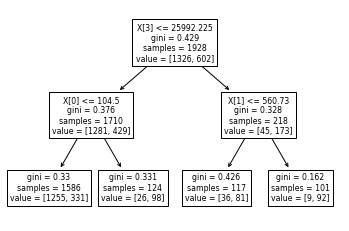

In [43]:
model_test_visual = DecisionTreeClassifier(random_state=5, max_depth = 2)
model_test_visual.fit(features_train, target_train)
tree.plot_tree(model_test_visual)

##### RandomForestClassifier

In [23]:
%%time
best_model_rf = None
best_result_rf = 0
best_est_rf = 0
best_depth_rf = 0
for i_rf in range(1,15): #итератор i_rf используем для подбора оптимальной глубины деревьев
    for est_rf in range(1, 15): #итератор est_rf используем для подбора оптимального кол-ва деревьев
        model_rf = RandomForestClassifier(random_state=5, n_estimators=est_rf, max_depth=i_rf) #передамим в гиперпараметры итераторы 2_х вложенных циклов
        model_rf.fit(features_train, target_train) # обучим модель на тренировочной выборке
        result_rf = model_rf.score(features_valid, target_valid) # оценим качество модели
        if result_rf > best_result_rf:
            best_model_rf = model_rf #сохраняем лучшую модель,
            best_result_rf = result_rf  #лучшую точность
            best_est_rf = est_rf #лучшее кол-во деревьев
            best_depth_rf = i_rf #лучшую глубину
 
print("Accuracy наилучшей модели:", best_result_rf)
print("при количестве оценщиков:", best_est_rf)
print("и глубине деревьев:", best_depth_rf)

Accuracy наилучшей модели: 0.8102643856920684
при количестве оценщиков: 8
и глубине деревьев: 5
CPU times: user 4.3 s, sys: 40 ms, total: 4.34 s
Wall time: 4.34 s


####  LogisticRegression

In [25]:
%%time
model_lr = LogisticRegression(random_state=5, solver='lbfgs', max_iter=1000) 
model_lr.fit(features_train, target_train) 
print(model_lr.score(features_valid, target_valid))

0.7573872472783826
CPU times: user 31.9 ms, sys: 0 ns, total: 31.9 ms
Wall time: 30 ms


Логистическая регрессия дала точность 0.7573872472783826

Вывод: мы рассмотрели 3 модели с различными гиперпараметрами. Из них наилучшие результаты на валидационной выборке показала модель случайного леса с 8_ю деревьями при глубине делава в 5 узлов. Ее мы и будем использовать в дальнейшем. Стоит отметить, что логистическая регрессия показала наименьший результат точности

## Проверьте модель на тестовой выборке

In [22]:
finish_model_forest = RandomForestClassifier(random_state=5, n_estimators= 8, max_depth= 5)
finish_model_forest.fit(features_train, target_train)
result_finish_model_forest = model_rf.score(features_test, target_test)
predicted_valid_rf = finish_model_forest.predict(features_test)
print(result_finish_model_forest)
print(best_result_rf - result_finish_model_forest)
print(recall_score(target_test, predicted_valid_rf))
print(precision_score(target_valid, predicted_valid_rf))
print(f1_score(target_valid, predicted_valid_rf))

0.7853810264385692
0.02488335925349916
0.465
0.296875
0.24437299035369778


Вывод: лучшая модель, отобранная на валидационной выборке показала на 2,5% меньше точности на тестовой выборке. Тем не менее достигнуто значение точности 78%, что является хорошим результатом 

## (бонус) Проверьте модели на адекватность

Проверку на адекватность выполним с путем сравнения нашей модели с dummy моделью, которая предсказывает наиболее часто встречающийся класс.

In [ ]:
bease_model = DummyClassifier(random_state=5)
bease_model.fit(features_train, target_train)
dummy_acc = bease_model.score(features_test, target_test)
dummy_acc

Простейшая модель на тестовой выборке показала результат точности 69%, тогда, как выбранная и настроенная RandomForestClassifier показала 78% на той же выборке. Можно сделать вывод, что модель прошла проверку на адекватность.

#### Общий вывод:

В рамках проектра поставлена задача построения модели для классификации, которая выберет для абонента новый подходящий тариф на основе потребляемых ранее услуг. Для реализации предоставлены данные о тарифных предпочтениях абонентов в новой тарифной линейке. Предоставленные данные полные, не потребовали предобработки. 

В ходе выполнения проекта рассмотрены 3 модели: 1) Решающее дерево, 2) Случайный лес, 3) Логистическая регрессия. Путем подбора  различных гиперпараметров и сравнения результатов выялено, что с поставленной задачей наилучшим образом справляется модель "Случайный лес" с количеством деревьев 8 и глубиной 5. Побдор модели выпонен на датасете, разбитом на ттренировочную, валидационную и тестовую выборки в пропорции 3:1:1. Модель Случайный лес с побобранными гиперпараметрами была проверена на тестовой выборке и показала 78% точности. Далее была выполнена проверка на адекватность с применением дамми модели, которая подтвердила адекватность случайного леса. 

Итог: лучшей моледью для решения текущей задачи по рекомендации тарифов является "Случайный лес", 8 деревьев, 3 узла.